In [55]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Constants for loading the data from a local file
IRIS_DATA_FILE = "iris_data.csv"

SEPAL_LENGTH_HEADER = "sepal length (cm)"
SEPAL_WIDTH_HEADER = "sepal width (cm)"
PETAL_LENGTH_HEADER = "petal length (cm)"
PETAL_WIDTH_HEADER = "petal width (cm)"


X_labels = [ 
    SEPAL_LENGTH_HEADER,
    SEPAL_WIDTH_HEADER,
    PETAL_LENGTH_HEADER,
    PETAL_WIDTH_HEADER
]

y_label = "class"

# Load the iris daa from sklearn
iris_data = load_iris()

In [3]:
def plot_two_features(iris_data, idx_1, idx_2):
    """
    iris_data: the iris dataset
    idx_1: index of the first feature to plot
    idx_2: index of the second feature to plot
    """
    fig, ax = plt.subplots()

    # Groups all data points for each feature into one array per feature
    features = iris_data.data.T
        
    # Plot the data
    ax.scatter(features[idx_1][:50], features[idx_2][:50], label=iris_data.target_names[0])
    ax.scatter(features[idx_1][50:100], features[idx_2][50:100], label=iris_data.target_names[1])
    ax.scatter(features[idx_1][100:150], features[idx_2][100:150], label=iris_data.target_names[2])    
    
    # Set graph labels
    ax.set_xlabel(iris_data.feature_names[idx_1])
    ax.set_ylabel(iris_data.feature_names[idx_2])
    ax.set_title(f"{iris_data.feature_names[idx_2]} vs {iris_data.feature_names[idx_1]}")
    ax.legend()

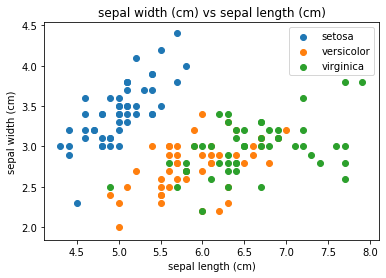

In [4]:
plot_two_features(iris_data, 0, 1)

In [5]:
# Split the data into train and test sets
X, y = load_iris(return_X_y=True)
rand_state = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rand_state)

In [6]:
# Run classifiers
def run_classifiers(X_train, X_test, y_train, y_test):
    classifiers = [
        LogisticRegression(solver="lbfgs", multi_class="auto", random_state=rand_state).fit(X_train, y_train),
        LinearSVC(random_state=rand_state).fit(X_train, y_train),
        DecisionTreeClassifier(random_state=rand_state).fit(X_train, y_train),
        KNeighborsClassifier(algorithm="brute").fit(X_train, y_train),
    ]
    
    scores = []
    for clf in classifiers:
        clf_name = type(clf).__name__
        clf_score = clf.score(X_test, y_test)
        scores.append((clf_name, clf_score))
    return scores

In [16]:
results = run_classifiers(X_train, X_test, y_train, y_test)

C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [86]:
def plot_classifier_results(results):
    fig, ax = plt.subplots()
    x_coord = [x[0] for x in results]
    heights = [x[1] for x in results]
    
    # Reduce decimal point precision
    
    # Add the values of each bar to the graph
    for i, val in enumerate(heights):
        ax.text(val + 0.2, i, "{:.4f}".format(val), fontweight="bold")
    ax.barh(x_coord, heights)
        
    ax.set_title("Classifier accuracy")

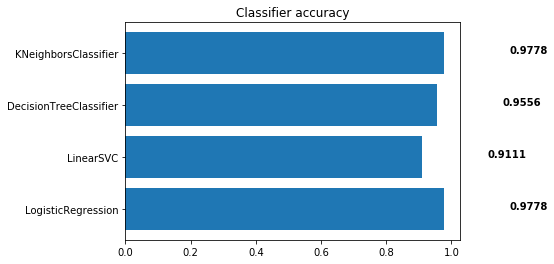

In [87]:
plot_classifier_results(results)